In [1]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
%matplotlib inline

# Generamos los datos

In [38]:
n = 5000
nclass = 10
rad = 0.5
np.random.seed(114041)
X = 9*np.random.rand(n,2) - 4
centroids = 2*np.random.randn(nclass,2)
def d(x,y):
    return np.sqrt(np.dot(x-y,x-y))

y = [[d(x,c) for c in centroids] for x in X]
y = np.array([int(min(i)<rad) for i in y])

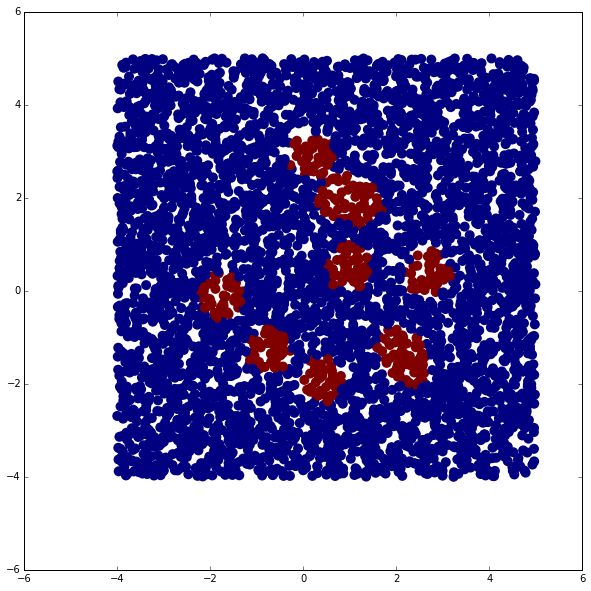

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=y,linewidths=0, s=100)

#SVM

## Entrenamos una máquina de soporte vectorial con kernel radial

In [42]:
svm = SVC(C=100, kernel='rbf')
svm.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

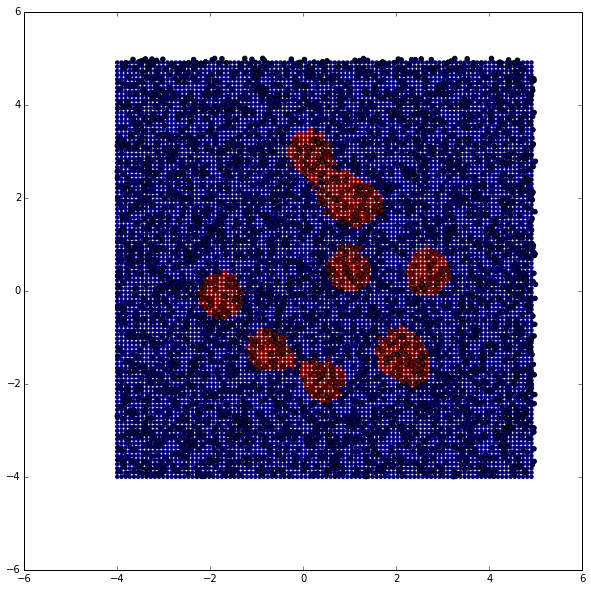

In [43]:
mi = np.min(X)
ma = np.max(X)
ticks = np.arange(mi,ma,(ma-mi)/100.0)
a, b = np.meshgrid(ticks, ticks)
a = a.ravel()
b = b.ravel()
X_grid = np.column_stack((a,b))
pred = svm.predict(X_grid)
plt.figure(figsize=(10,10))
plt.scatter(X_grid[:,0],X_grid[:,1],c=pred,linewidths=0)
plt.scatter(X[:,0],X[:,1],c=y)

# KNN

In [44]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=10, p=2, weights='uniform')

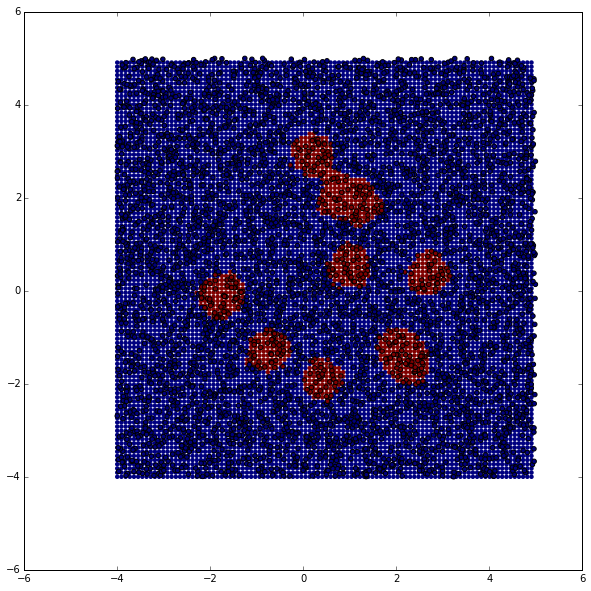

In [50]:
mi = np.min(X)
ma = np.max(X)
ticks = np.arange(mi,ma,(ma-mi)/100.0)
a, b = np.meshgrid(ticks, ticks)
a = a.ravel()
b = b.ravel()
X_grid = np.column_stack((a,b))
pred = knn.predict(X_grid)
plt.figure(figsize=(10,10))
plt.scatter(X_grid[:,0],X_grid[:,1],c=pred,linewidths=0)
plt.scatter(X[:,0],X[:,1],c=y)

#Comparamos los modelos

In [ ]:
svm1 = SVC(C=100.0, kernel='rbf')
knn1 = KNeighborsClassifier(n_neighbors=10)
models = [svm1, knn1]
fits = [m.fit(X,y) for m in models]
preds = [f.predict(X) for f in fits]

errs = 100.0*np.array([sum(y!=preds[i]) for i in range(len(preds))])/len(y)



## el error del modelo SVM

In [71]:
errs[0]

1.1000000000000001

## el error del modelo KNN

In [72]:
errs[1]

1.02